In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Load dataset
df = pd.read_csv('Zoo.csv')
print("Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())

Dataset Shape: (101, 18)
First 5 Rows:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1 

In [3]:
# ======================
# Data Analysis & EDA
# ======================
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


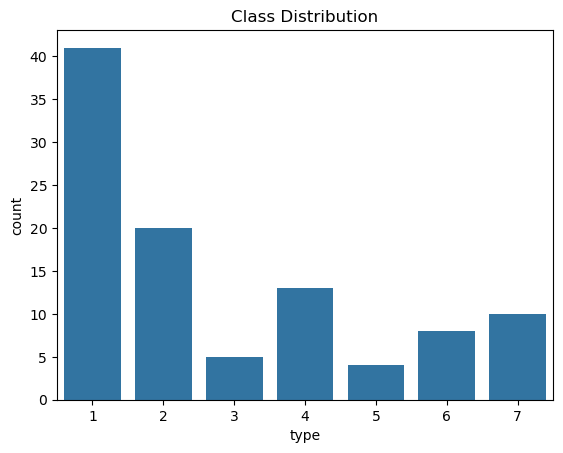

In [4]:
# Target variable: 'type' (animal class)
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.show()

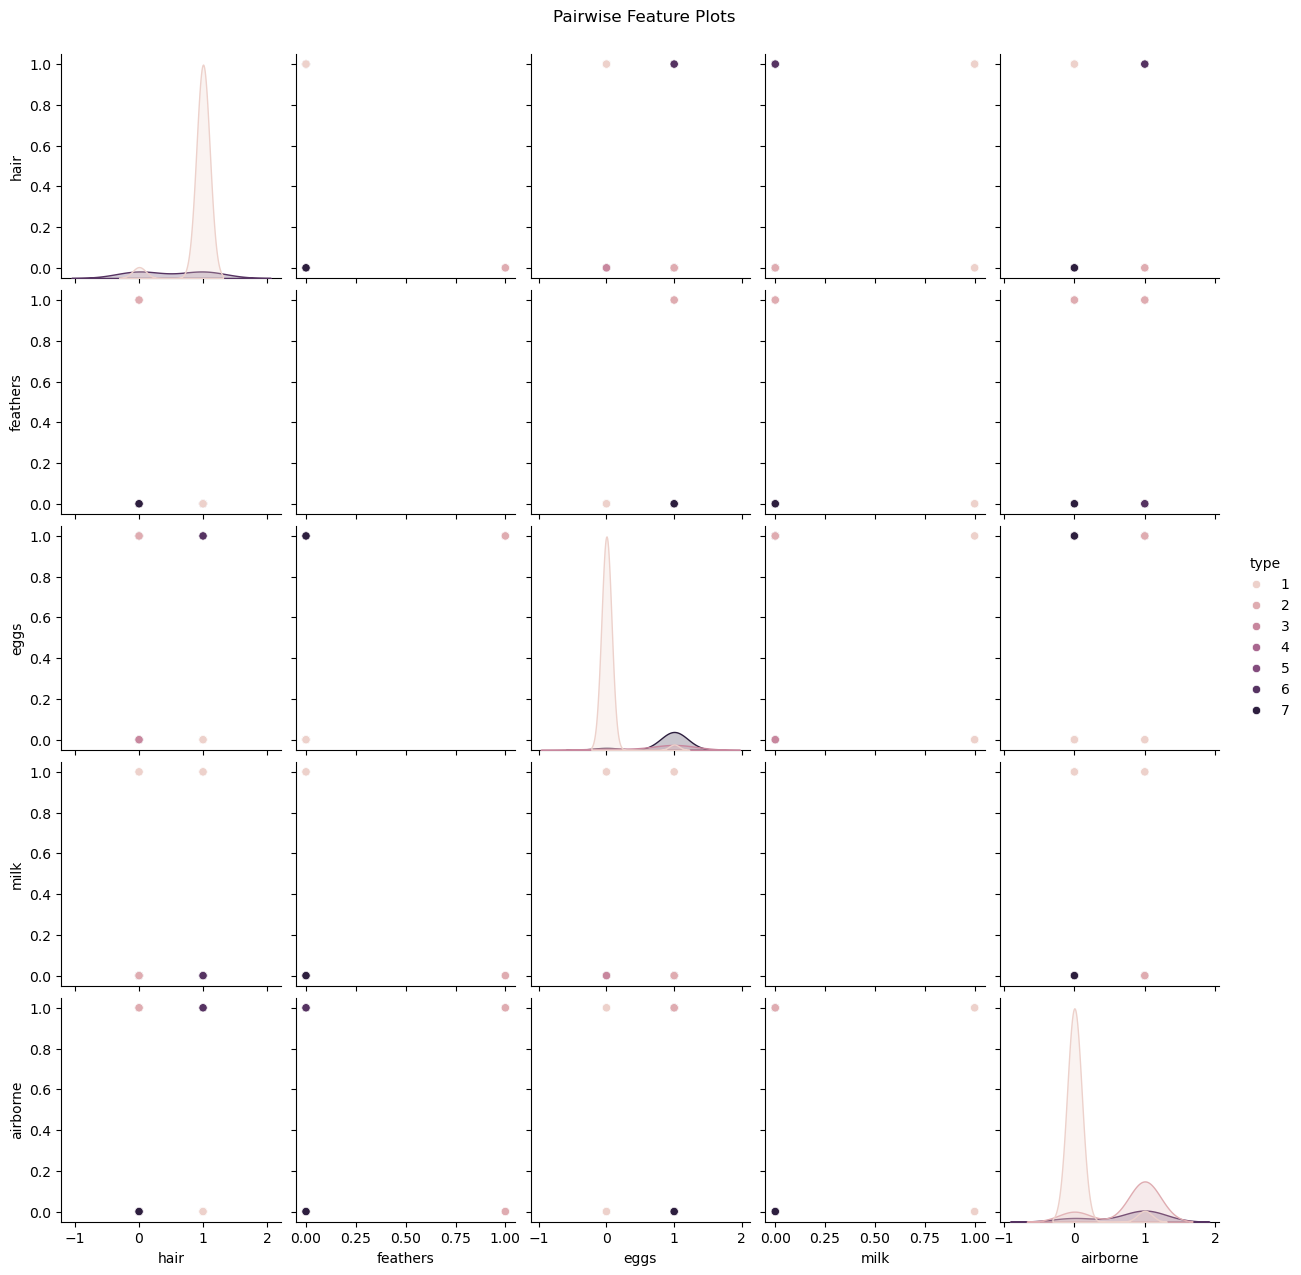

In [5]:
# Pairplot (first few features for visualization)
sns.pairplot(df.iloc[:, 1:6].join(df['type']), hue='type')
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

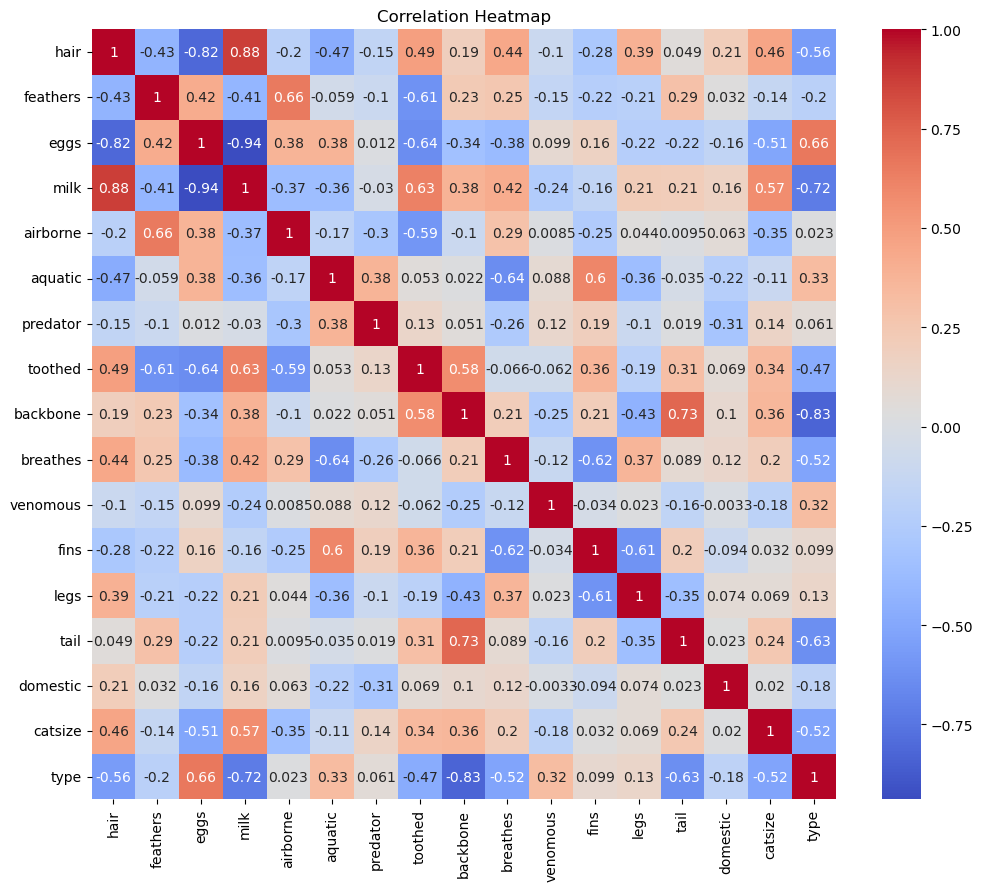

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['animal name']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# ======================
# Preprocessing
# ======================

# Drop the 'animal name' column (non-numeric identifier)
df = df.drop(columns=['animal name'])

In [8]:
# Split into features and target
X = df.drop(columns='type')
y = df['type']

In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# ==============================
# Train-Test Split (80-20)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# ==============================
# KNN Implementation
# ==============================


# Try different values of K
k = 5  # or any integer you want
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski') # default is Euclidean
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Predictions
y_pred = knn.predict(X_test)

In [13]:
# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred, average='weighted')
}


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [14]:
print("\nModel Evaluation Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [15]:
# ===========================
# Visualizing Decision Boundary
# ===========================

# PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [19]:
# Re-train KNN on PCA-transformed data
X_train_pca, X_test_pca = X_pca[y.index.isin(y_train.index)], X_pca[y.index.isin(y_test.index)]
knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [21]:
# Create mesh grid
h = .05
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [23]:
# Predict over grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

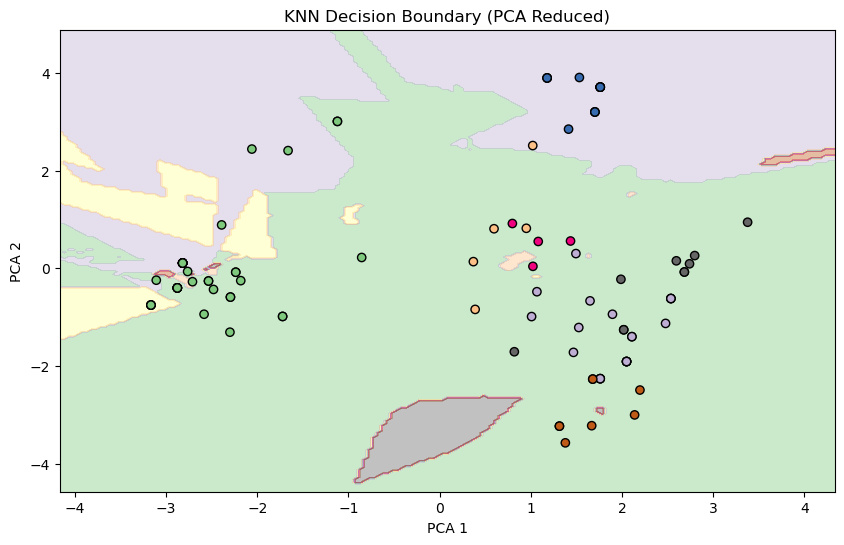

In [25]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Accent')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='Accent')
plt.title("KNN Decision Boundary (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()